In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

%matplotlib inline

In [4]:
plt.style.use('seaborn')
sns.set_theme(style="darkgrid")

# Get data

## Take a quick look at the data structure

In [5]:
housing = pd.read_csv("data/housing.csv")

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


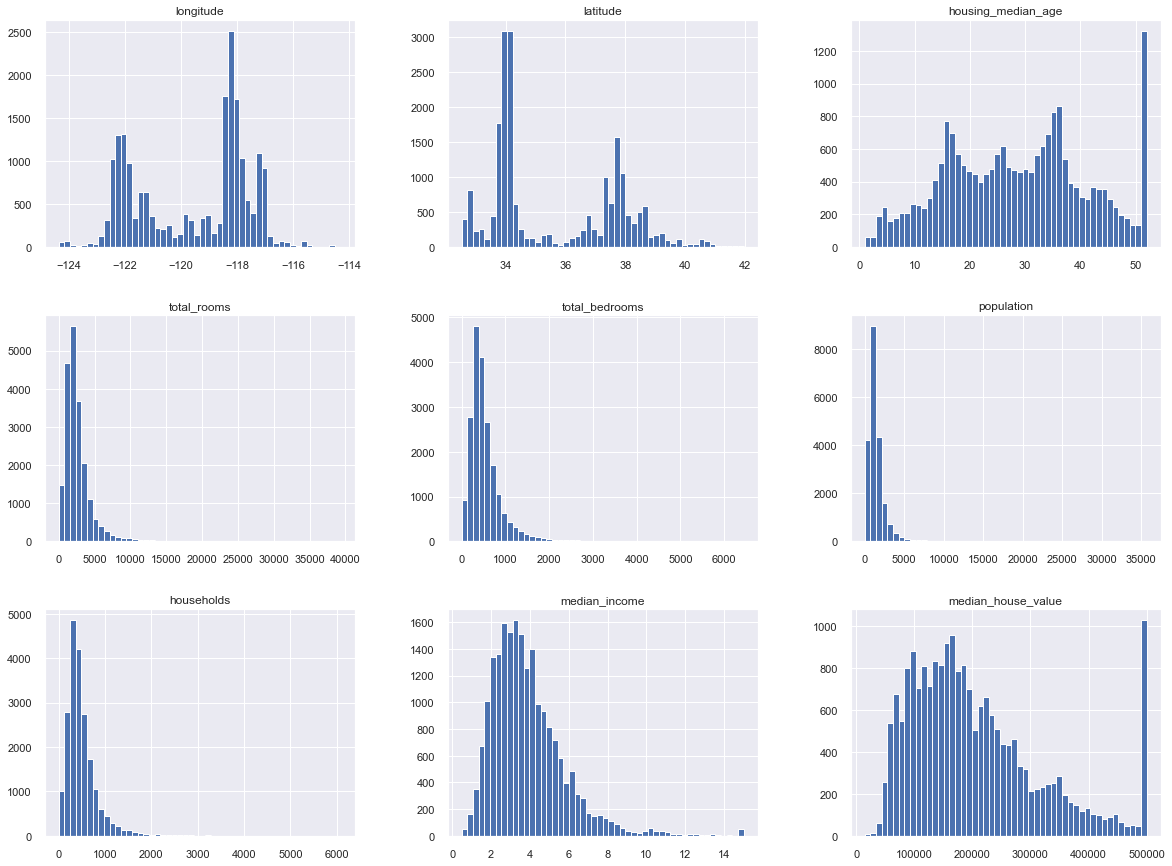

In [10]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Create a test set

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

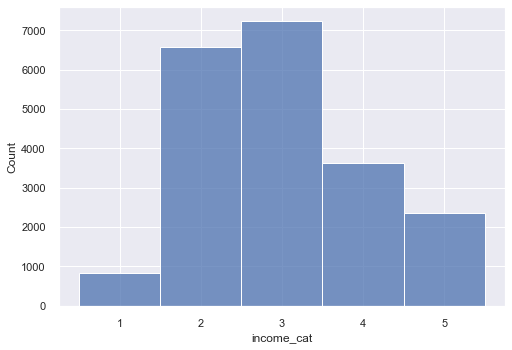

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])
sns.histplot(data=housing, x="income_cat", binwidth=0.5)
plt.show()

In [13]:
split = StratifiedShuffleSplit(n_splits=1, 
                               test_size=0.2,
                               random_state=42)

In [14]:
for train_index, test_index in split.split(housing,
                                          housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [17]:
housing = strat_train_set.copy()

## Visualizing geographical data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'A geographical scatterplot of the data')

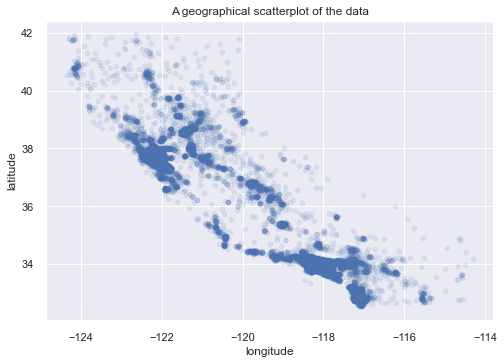

In [18]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             alpha=0.1)
plt.title("A geographical scatterplot of the data")

Text(0.5, 1.0, 'California housing prices')

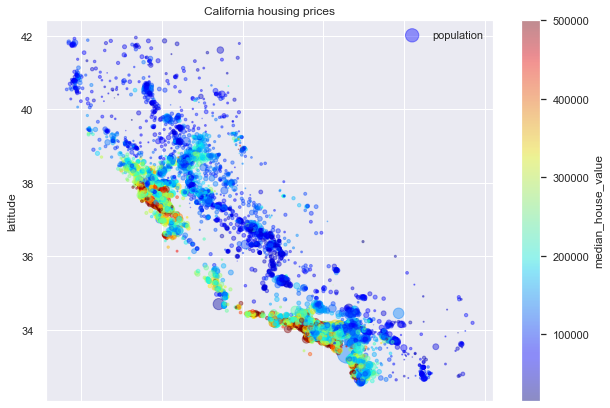

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing["population"]/100, label="population", figsize=(10, 7), 
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.title("California housing prices")

## Looking for correlations

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [22]:
from pandas.plotting import scatter_matrix

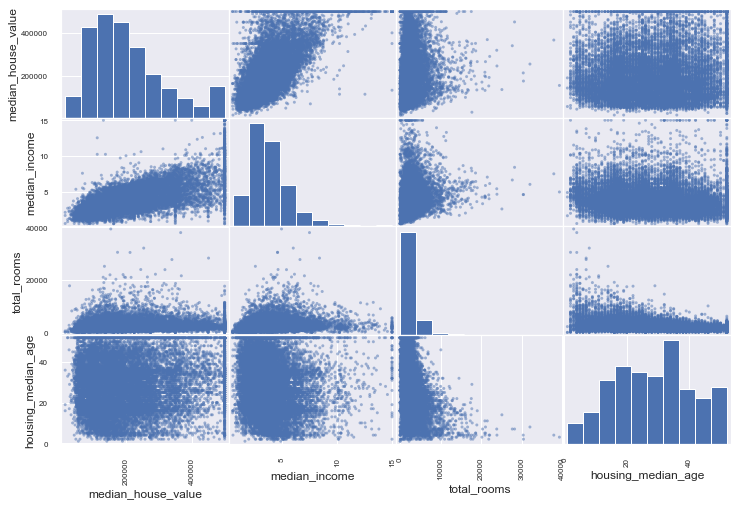

In [23]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), )
plt.show()

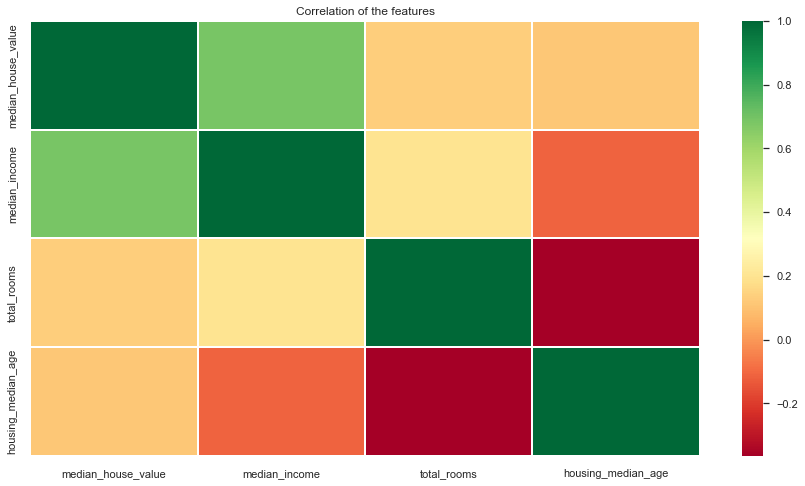

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(housing[attributes].corr(), cmap="RdYlGn", linewidths=0.4)
plt.title("Correlation of the features")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Median income versus median house value')

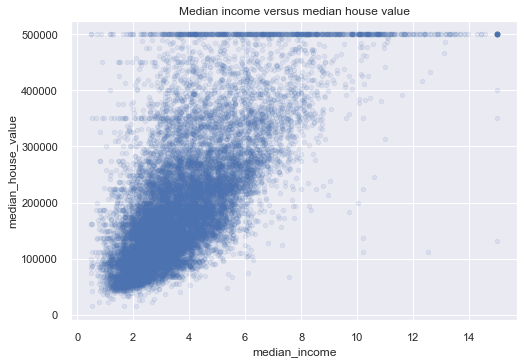

In [25]:
housing.plot(kind="scatter", x="median_income",
            y="median_house_value", alpha=0.1)
plt.title("Median income versus median house value")

## Experimenting with attribute combinations

In [26]:
housing["rooms_per_household"] = \
    housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = \
    housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = \
    housing["population"] / housing["households"]

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

<AxesSubplot:>

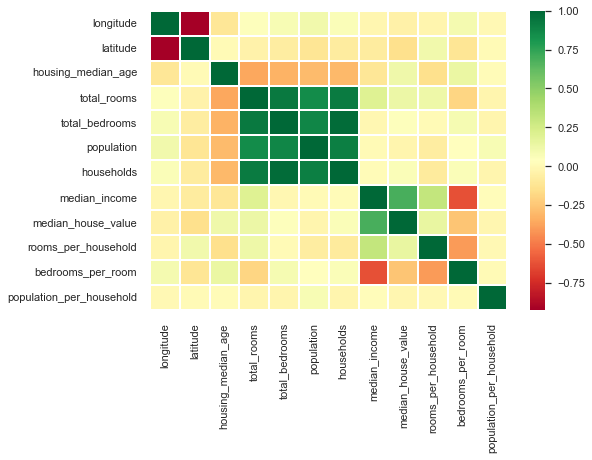

In [28]:
sns.heatmap(corr_matrix,cmap="RdYlGn", linewidths=0.4)

# Prepare the data for machine learning algorithms

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data cleaning

Most ML algorithms cannot work with missing features, so let's create a few functions to take care of them. We saw earlier that the *total_bedrooms* attribute has some missing values, so let's fix this. You have three options:
* get rid of the corresponding districts
* get rid of the whole attribute
* set the values to some value (zero, the mean, the median, etc.)

In [30]:
housing.dropna(subset=["total_bedrooms"])   # option 1 
housing.drop("total_bedrooms", axis=1)      # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy="median")

In [33]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


Now you can use this "trained" *imputer* to transform the training set by replacing missing values with the learned medians:

In [36]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## Handling Text and categorical attributes

In [37]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Кодирование с одним активным состоянием или унитарным кодированием (one-hot encoding). Модуль scikit-learn предлагает кодировщик OneHotEncoder для преобразования целочисленных категориальных значений в векторы в унитарном коде

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
cat_encoder = OneHotEncoder()
housing_cat_lhot = cat_encoder.fit_transform(housing_cat)
housing_cat_lhot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_lhot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom transformers

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

In [46]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [47]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [48]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

### Transformation Pipelines

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [51]:
from sklearn.compose import ColumnTransformer

In [52]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [53]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [54]:
housing_prepared = full_pipeline.fit_transform(housing)

In [55]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [56]:
housing_prepared.shape

(16512, 16)

# Select and train a model

## Training and evaluating on the training set

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [59]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [60]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [65]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better evaluation using cross-validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [68]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [69]:
display_scores(tree_rmse_scores)

Scores:  [72930.95272194 70709.70827252 69784.37167986 72178.07343369
 70726.0219399  78435.4272493  71029.72087552 72649.04961841
 67870.25282354 70006.97921707]
Mean:  71632.05578317601
Standard deviation:  2674.804848848159


In [70]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=10)

In [71]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.328209818067


In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51351.99567044 48773.56609711 47319.51740069 51972.1918093
 47593.34740917 51775.19879202 52371.65298028 49656.36498439
 48628.23232897 54248.67164866]
Mean:  50369.07391210372
Standard deviation:  2183.1970142731857


# Fine-Tune your model

## Grid search

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

In [82]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [85]:
cvres = grid_search.cv_results_

In [88]:
for mean_score, params in zip(cvres["mean_test_score"],
                              cvres["params"]):
    print(np.sqrt(-mean_score), params)

63346.47562696625 {'max_features': 2, 'n_estimators': 3}
54995.17907115443 {'max_features': 2, 'n_estimators': 10}
52242.418054579015 {'max_features': 2, 'n_estimators': 30}
60456.1395469203 {'max_features': 4, 'n_estimators': 3}
52631.2660173085 {'max_features': 4, 'n_estimators': 10}
50302.84448465637 {'max_features': 4, 'n_estimators': 30}
58616.6506542949 {'max_features': 6, 'n_estimators': 3}
52116.78088078108 {'max_features': 6, 'n_estimators': 10}
50131.47704006456 {'max_features': 6, 'n_estimators': 30}
57937.032533539765 {'max_features': 8, 'n_estimators': 3}
52273.137931068435 {'max_features': 8, 'n_estimators': 10}
50263.636657486335 {'max_features': 8, 'n_estimators': 30}
61325.15280708793 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53963.342511270326 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59518.50450401414 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52602.412165034286 {'bootstrap': False, 'max_features': 3, 'n_estimators':

## Randomized search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous exmaple, but when the hyperparameter search space is large, it is often preferable to use *RandomizedSearchCV* instead.

## Ensemple methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or "ensemble") will often perform better that the best individual model (just like RandomForests pergorm bettern that the individual Decision trees they rely on), especially if the individual models make very different types of errors.

## Analyze the best models and their errors

In [91]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.17319629e-02, 7.26465028e-02, 4.36669286e-02, 1.87863531e-02,
       1.63027575e-02, 1.86985548e-02, 1.58306055e-02, 3.51735092e-01,
       5.53761842e-02, 1.00173881e-01, 7.44375912e-02, 1.58009245e-02,
       1.25313368e-01, 3.12846213e-05, 4.42300178e-03, 5.04500776e-03])

In [92]:
extra_attribs = \
    ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [96]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35173509168725153, 'median_income'),
 (0.1253133675535662, 'INLAND'),
 (0.10017388135340291, 'pop_per_hhold'),
 (0.08173196293702796, 'longitude'),
 (0.07443759119530964, 'bedrooms_per_room'),
 (0.07264650279676635, 'latitude'),
 (0.05537618421264282, 'rooms_per_hhold'),
 (0.043666928588249464, 'housing_median_age'),
 (0.018786353106384508, 'total_rooms'),
 (0.01869855478107728, 'population'),
 (0.01630275753750558, 'total_bedrooms'),
 (0.01583060554356256, 'households'),
 (0.015800924538910195, '<1H OCEAN'),
 (0.005045007764856674, 'NEAR OCEAN'),
 (0.004423001782169687, 'NEAR BAY'),
 (3.1284621316719123e-05, 'ISLAND')]

## Evaluate your system on the test set

In [97]:
final_model = grid_search.best_estimator_

In [100]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [101]:
final_predictions = final_model.predict(X_test_prepared)

In [102]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)